<a href="https://colab.research.google.com/github/nkatara/iiit-ai-ml/blob/main/U1W3_09_LC_Fruits_data_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint


## Learning Objective

The objective of this experiment is to understand Linear classifier

## Dataset

The dataset chosen for this  experiment is a handmade fruits dataset. The dataset contains 69 records. Each record represents the following details of fruits :

*  Weight -   It is the mass of an object. With respect to this dataset, we have calculated the weights in grams

* Sphericity -   is a measure of how closely the shape of an object approaches that of a mathematically perfect sphere.

* Color -  Every fruit has a different color at different stages. You can encode the color to an integer value. For example

     - Green as 20
     - Greenish Yellow as 40
     - Orange as 60
     - Red as 80
     - Reddish Yellow as 100

*  Label -   We have considered two fruits for simplicity. They are Apple and Orange.




### Setup Steps:

In [1]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2501952" #@param {type:"string"}

In [2]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "8439328088" #@param {type:"string"}

In [3]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython
import re
ipython = get_ipython()

notebook= "U1W3_09_LC_Fruits_data_A" #name of the notebook

def setup():
#  ipython.magic("sx pip3 install torch")
    from IPython.display import HTML, display
    ipython.magic("sx wget https://cdn.talentsprint.com/aiml/Experiment_related_data/fruits_weight_sphercity.csv")
    display(HTML('<script src="https://dashboard.talentsprint.com/submissions/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")

    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword(), "batch" : ""}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:
        print(r["err"])
        return None
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts() and getWalkthrough() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional,
              "concepts" : Concepts, "record_id" : submission_id,
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook, "feedback_walkthrough":Walkthrough ,
              "feedback_experiments_input" : Comments,
              "feedback_inclass_mentor": Mentor_support, "batch" : ""}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:
        print(r["err"])
        return None
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://learn-iiith.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id


def getAdditional():
  try:
    if not Additional:
      raise NameError
    else:
      return Additional
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None

def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None


def getWalkthrough():
  try:
    if not Walkthrough:
      raise NameError
    else:
      return Walkthrough
  except NameError:
    print ("Please answer Walkthrough Question")
    return None

def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None


def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError
    else:
      return Answer
  except NameError:
    print ("Please answer Question")
    return None


def getId():
  try:
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


## Import Required Packages

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import SGDClassifier

## Load the data

In [6]:
fruits_data = pd.read_csv("fruits_weight_sphercity.csv") # YOUR CODE HERE: To read the csv file
fruits_data.head()

,Color,Weight,Sphericity,labels
0,Red,200,0.40,apple
1,Orange,320,1.00,orange
2,Orange,310,0.95,orange
3,Red,220,0.45,apple
4,Red,230,0.50,apple


In [7]:
fruits_data['Color'] = fruits_data['Color'].replace(['Green', 'Greenish yellow','Orange', 'Red','Reddish yellow'],[20, 40, 60, 80, 100])
fruits_data['labels'] = fruits_data['labels'].replace(['apple','orange'],[1, 0])

/tmp/ipython-input-1970222004.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fruits_data['Color'] = fruits_data['Color'].replace(['Green', 'Greenish yellow','Orange', 'Red','Reddish yellow'],[20, 40, 60, 80, 100])
/tmp/ipython-input-1970222004.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fruits_data['labels'] = fruits_data['labels'].replace(['apple','orange'],[1, 0])


**To get better understanding of the data let us visualize first five rows of the data using head () and last five rows of the data using tail()**

In [8]:
# YOUR CODE HERE: To visualize the first five rows of data
fruits_data.head()

,Color,Weight,Sphericity,labels
0,80,200,0.40,1
1,60,320,1.00,0
2,60,310,0.95,0
3,80,220,0.45,1
4,80,230,0.50,1


In [9]:
# YOUR CODE HERE: To visualize the last five rows of data
fruits_data.tail()

,Color,Weight,Sphericity,labels
64,80,200,0.43,1
65,80,200,0.49,1
66,80,200,0.42,1
67,80,201,0.40,1
68,80,202,0.40,1


There are a few noisy samples in the data which is skew in the accuracies. So here is the code to drop them. However before un-commenting the code below, go through the experiment and visualize those noisy samples and then re-run the experiment after un-commenting the lines below.

In [ ]:
#fruits_data = fruits_data.drop(fruits_data[(fruits_data['labels'] == 1) & (fruits_data['Weight'] > 325)].index)
#fruits_data = fruits_data.drop(fruits_data[(fruits_data['labels'] == 0) & (fruits_data['Weight'] < 290)].index)
#fruits_data.head()
# To understand the above code properly look at the plot and also try to drop the noisy data of class 0 & class 1.

## Store data and labels in two seperate variables


In [10]:
# YOUR CODE HRER: To store data variables
data = fruits_data[["Weight", "Color", "Sphericity"]]

In [11]:
# YOUR CODE HRER: To store labels variables
labels = fruits_data["labels"]

In [12]:
data.shape, type(data)

((69, 3), pandas.core.frame.DataFrame)

## Visualizing the data

 Plot 2 parameters (out of the three) for visualization. (If you're interested in plotting in 3-D, which might be of help here, you can explore Matplotlib's Axes3D [here](https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html))

In [13]:
apples = fruits_data[fruits_data['labels']== 1] # apples are 1
oranges = fruits_data[fruits_data['labels']== 0] # oranges are 0

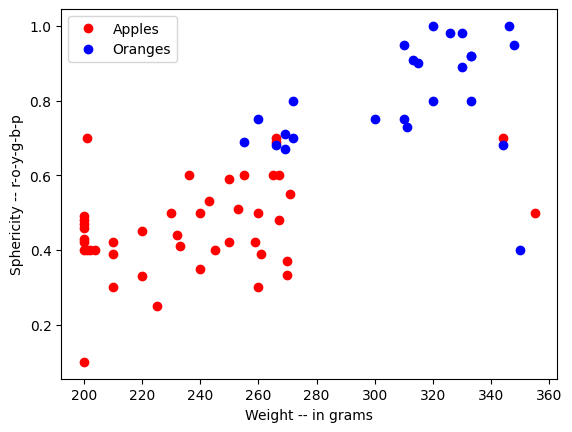

In [14]:
plt.plot(apples.Weight, apples.Sphericity, "ro")
plt.plot(oranges.Weight, oranges.Sphericity, "bo")

plt.xlabel("Weight -- in grams")
plt.ylabel("Sphericity -- r-o-y-g-b-p")

plt.legend(["Apples", "Oranges"])

plt.show()

## Split the data into train and test sets

In [15]:
from sklearn.model_selection import train_test_split
# YOUR CODE HERE: To split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [16]:
# The size of train and test sets
X_train.shape, X_test.shape

((55, 3), (14, 3))

## Train a  Linear Classifier

In [17]:
linear_classifier = SGDClassifier(random_state=42)

In [19]:
# YOUR CODE HERE: To Fit the model with the train data
linear_classifier.fit(X_train, y_train)

# Test the trained model
y_pred = linear_classifier.predict(X_test) # YOUR CODE HERE: To predict


In [20]:
# Calculate the score
linear_classifier.score(X_test, y_test)

0.5

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.5

Not happy with the accuracies? How about trying to see which exact samples caused the accuracies to drop? (Especially given that this is a small dataset which can be doable. This sort of analysis is infeasible on large-datasets)

### Please answer the questions below to complete the experiment:




In [22]:
#@title In logistic regression the output of linear regression is passed through? { run: "auto", form-width: "500px", display-mode: "form" }
Answer = "Sigmoid function" #@param ["","Sigmoid function","Constant function", "Relu Function","None of the above"]


In [23]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good and Challenging for me" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [24]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "Good experiment to understand Linear classifier" #@param {type:"string"}


In [25]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]


In [26]:
#@title  Experiment walkthrough video? { run: "auto", vertical-output: true, display-mode: "form" }
Walkthrough = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [27]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [28]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [29]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 3134
Date of submission:  06 Dec 2025
Time of submission:  01:46:56
View your submissions: https://learn-iiith.talentsprint.com/notebook_submissions
